# HW CI-4  Clustering Algorithms
### Computational Intelligence - STRATEGOS UNIGE
#### Names:  Muhammad Ashir Wahid-5196885 and Ambreen Aslam -5151961    
#### Date: 7 April 2022

# Assignment: Develop Hard and Fuzzy Clustering Algorithms from scratch
We will implement some clustering algorithms from scratch and we will test on two data sets constituted by some 2-dimensional distributions of points.

Then we will apply our algorithms to a real-word data set.


### TODO:
1. Generate data sets DS1 (non overlapping blobs), DS2 (overlapping blobs) and load DS3 from the file iris.csv.
2. Implement K-Means, Fuzzy C- Means and Graded Possibilistic C-Means.
3. Implement  WTA and the $\alpha - cut$ defuzzifiers of fuzzy partitions.
4. Implement RAND and Jaccard Indeces for hard partition comparison
5. Apply K-Means, Fuzzy C-Means and Graded Possibilistic C-Means to the 3 data sets using a multi-start approach; search for 2, 3, and 4 clusters.
6.  Defuzzify the soft partitions of  Fuzzy C- Means and Graded Possibilistic C-Means using the WTA (Winner-Takes-All) criterion.
7. Visualize the results on the scatter plot, highlighting the centroids and using a different color for each cluster.
8.  Measure the *accuracy* of the hard partitions by comparing them with the ground-truth constituted by the targets of the data sets. For the comparison use RAND and Jaccard indeces. 

For the Graded Possibilistic C-Means use a possibilistic degree $\beta=0.8$ and a value of $\eta$ (identical for each cluster) comparable with the *standard_dev*$^2$ for data sets DS1 and DS2. For DS3 (Iris data set)  $\eta$ must be selected by checking the value of the accuracy (model selection - grid search).


### Optional part A: Consensus Matrix
1. Implement the Consensus Matrix technique for partition ensembling. 
2. For each data set, take the 9 best hard partitions (3 clusters) obtained for data set DS2 in Part A and construct an ensemble using the tecnique of the consensus matrix. 
3. Visualize the results on the scatter plot, highlighting the centroids and using a different color for each cluster.
4. Measure the *accuracy* of the  partition induced by  the consensus matrix  by comparing it with the ground-truth constituted by the targets of the data sets. For the comparison use RAND index. Find the best value for the threshold $\alpha$.

### Optional part B: Study of the Graded Possibilistic C-Means algorithm

see below



## Import libraries

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import time  #timing the performances
import copy

## 1 Data sets generation

### Data set DS1: Separate blobs

 * number of points in the dataset  400
 * number of features in the dataset  2
 * number of clusters in the dataset 3   
 * standard deviation of points of a cluster 0.70 

In [ ]:
# Dataset setup   crea nuovo dataset
number_of_points = 400   # number of points in the dataset
number_of_features = 2    # number of features in the dataset
number_of_clusters = 3    # number of clusters in the dataset
standard_dev = 0.70       # standard deviation of points of a cluster
  # st dev alta mi alza le distanze

features, target = make_blobs(n_samples = number_of_points, 
                  n_features = number_of_features,
                  centers = number_of_clusters,
                  cluster_std = standard_dev,
                  shuffle = True)
# il dataset ha features e target
# makeblobs è di sklearn 

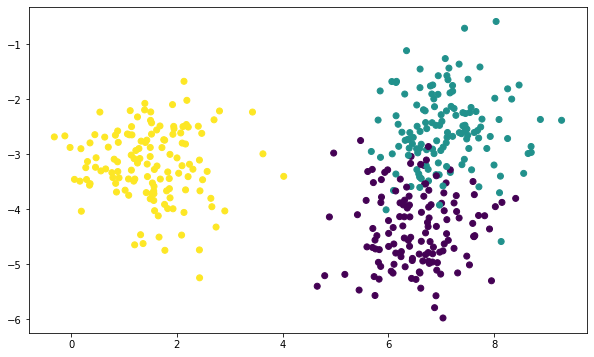

In [ ]:
# Create a scatterplot of first two features

#creating array of for c clusters and 400 features


plt.figure(figsize=(10,6))
plt.scatter(features[:,0], features[:,1], c=target)

# View scatterplot
plt.show()


In [ ]:
x_labels = ['Feature'+str(x) for x in range(features.shape[1])]
y_label = 'target'

feats = pd.DataFrame(features, columns=x_labels)
tgts = pd.Series(target, name=y_label)
dataset1 = pd.concat([feats,tgts],axis=1)
dataset1.head()

,Feature0,Feature1,target
0,5.702309,-4.698122,0
1,7.340054,-4.161537,0
2,7.410921,-2.245790,1
3,1.314874,-4.465950,2
4,2.742432,-4.326481,2


### Data set DS2: Overlapping  blobs
 * number of points in the dataset  400
 * number of features in the dataset  2
 * number of clusters in the dataset 3   
 * standard deviation of points of a cluster 1.70 

In [ ]:
# Dataset setup
number_of_points = 400    # number of points in the dataset
number_of_features = 2    # number of features in the dataset
number_of_clusters = 3    # number of clusters in the dataset
standard_dev = 1.70       # standard deviation of points of a cluster


features, target = make_blobs(n_samples = number_of_points, 
                  n_features = number_of_features,
                  centers = number_of_clusters,
                  cluster_std = standard_dev,
                  shuffle = True)

In [ ]:
ZeroList = np.zeros((3,400))

#print (ZeroList)
#creating a list of all the zeros for the number of targets we have so that we can run our test later

for i in range(0,len(target)):
    el = target[i]
    ZeroList[el,i] = 1
    
GT_list= list()
GT_list.append(ZeroList)
print(GT_list)



[array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])]


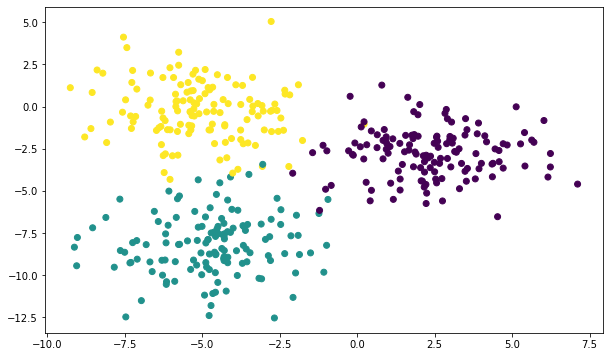

In [ ]:

# Create a scatterplot of first two features
plt.figure(figsize=(10,6))
plt.scatter(features[:,0], features[:,1], c=target)

# View scatterplot
plt.show()




In [ ]:
x_labels = ['Feature'+str(x) for x in range(features.shape[1])]
feats = pd.DataFrame(features, columns=x_labels)
tgts = pd.Series(target, name='target')
dataset2 = pd.concat([feats,tgts],axis=1)
dataset2.head()

,Feature0,Feature1,target
0,-7.501660,-8.644862,1
1,-8.207185,1.977507,2
2,-5.692888,1.293990,2
3,4.173844,-2.094026,0
4,-4.227330,-10.947644,1


### Data set DS3: Iris Data set 

Read the data set from the file *iris.csv* as done in *HW-CI-3-KNN.ipynb*


In [ ]:
# insert code here
# see DEMO CI3-a kNN classifier

col_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('iris.csv', names=col_names)

#print (tgts)
target = 'class'

#creating dataset for petal width and length
x = dataset.get('petal-length')
y = dataset.get('petal-width')

TargetMatrix = dataset.get(target)
ModMatrix = list()
#we will run a loop for every target value and assign number and append to a new column

#identifying each feature with a number 0,1,2 
for tgts in TargetMatrix:
    if tgts=='Iris-setosa':
        ModMatrix.append(0)
    if tgts=='Iris-versicolor':
        ModMatrix.append(1)
    if tgts=='Iris-virginica':
        ModMatrix.append(2)

target = pd.Series(ModMatrix, name='target')    #created a new series with the appended data
datasetIris = pd.concat([x,y,target],axis=1) 

print(datasetIris)


     petal-length  petal-width  target
0             1.4          0.2       0
1             1.4          0.2       0
2             1.3          0.2       0
3             1.5          0.2       0
4             1.4          0.2       0
..            ...          ...     ...
145           5.2          2.3       2
146           5.0          1.9       2
147           5.2          2.0       2
148           5.4          2.3       2
149           5.1          1.8       2

[150 rows x 3 columns]


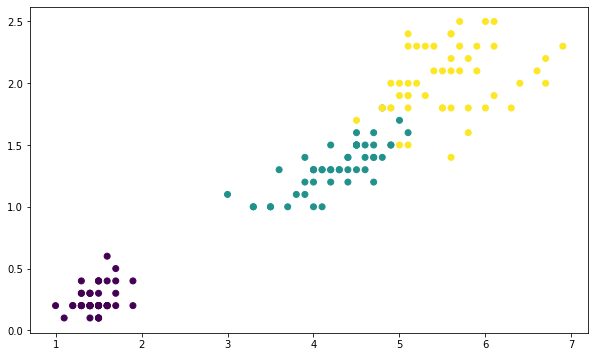

In [ ]:
# after downloaded the Iris data set uncomment the code in this box

#Create a scatterplot of first two features
plt.figure(figsize=(10,6))
plt.scatter(x,y,c=target)

# View scatterplot
plt.show() 

In [ ]:

GT_iris = np.zeros((3,150), dtype=int)

for i in range(0,len(target)):
    el = target[i]
    GT_iris[el,i] = 1
    
GT_list.append(GT_iris)
print(GT_list)

[array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      

In [ ]:
# after downloaded the Iris data set uncomment the code in this box

x_labels = ['Feature'+str(x) for x in range(features.shape[1])]
feats = pd.DataFrame(features, columns=x_labels)
tgts = pd.Series(target, name='target')
dataset2 = pd.concat([feats,tgts],axis=1)
dataset2.head()

,Feature0,Feature1,target
0,-1.171644,2.434095,0.0
1,5.465683,-1.854309,0.0
2,-1.875120,-5.813020,0.0
3,-2.913915,-7.217382,0.0
4,10.391301,0.238920,0.0


## 2 Implentation of clustering algoritms 

### K-Means (aka Hard C-Means)
K-Means minimizes the functional 
 
 
 $$
  E(X) = \sum_{i=1}^{K}\sum_{{\bf x} \in \pi_i} \| {\bf x} - {\bf v}_i \|^2
=\sum_{ih} u_{ih}\| {\bf x}_{h} - {\bf v}_i \|^2,\; \;  \mbox{with}\; \; u_{ih}= \left \{ 
 \begin{array}{ll}    
          1 & if \; \boldsymbol{x}_{h} \in \pi_i \\
         0 & otherwise
        \end{array}\right. $$
        
 
 where $\bf x$ is a point of the data set, $n$ is the size of the data set, $K$ is the number of clusters,  ${\bf v}_i$ are the centroids, and
 $\pi_i$ is the subset of the data set belonging to cluster $i$. Note that $E(X)$ is proportional to the expectation of distortion.
 
In this implementation we will initialize the cluster centers by selecting at random  K  points from the data set, and  then we will iterate the re-evaluation of all $\pi_i$ and of ${\bf v}_i$, until a STOP CRITERION holds.
 
The STOP CRITERION can be:

1. *Stop when the variation of $E(X)$ in two subsequent cycles ($\Delta E$) is under an assigned threshold $\tau > 0$*.
2. *Stop when the maximum variation of the centroids ${\bf v}_i$  in two subsequent cycles ($\Delta {\bf v}$) is under an assigned threshold $\tau > 0$*.
3. *Stop after an assigned number $S$ of iterations*.

We suggest to use the following combined STOP CRITERION:  **Stop after an assigned numer $S$ of iterations** AND **Stop when the variation of $<E> =\frac{E(X)}{K \cdot n}$ in two subsequent cycles ($\Delta <E>$) is under an assigned threshold $\tau > 0$**.

In [ ]:
# add here the required imports
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d #for voronoi tessellation

In [ ]:
class KMeans:

    def __init__(self, k=3, tau=0.001, max_iter=300, verbose=False):
        self.k = k # number of centroids
        self.tau = tau # stopping threshold
        self.max_iter = max_iter # maximum number of iterations in case of no convergence
        self.verbose = verbose # detailed printout
        self.cost = list() # service variable to store cost history
        self.centroids = None # centroids after fitting
        self.U = None # membership matrix (for K-Means U is hard, i.e. its element are 0/1)

        # additional variable shared among the various functions
        self.n = 0 # holds the dataset size
        self.prev_error = np.inf # assign initial error as infinite
        self.iteration = None # interation number
        self.error =  None # private variable to hold error E(X)
        self.distances = None # private variable to hold distances
        self.prev_centroids = None
        self.x_map = None
        
        
    def get_centroids(self):
        return self.centroids
    
    def get_U(self):
        UU = copy.deepcopy(self.U)      
        return UU.transpose()

    
    def get_cost_history(self):
        return self.cost
    
    def plot_cost_history(self, size_x = 15, size_y = 6, data=None, label=None):
        if data==None:
            data= self.cost
        if label==None:
            label = 'Cost History'
            
        # simply plot the cost history
        fig, ax = plt.subplots(figsize=(size_x,size_y))

        ax.plot(data, color='r', label=label)     # cost line
        ax.legend()
        plt.show()
        return ax

    def calc_cost(self):
        # reset distances for items for farther clusters
        # define the cluster index list for data items
        x_map = np.argmin(self.distances,axis=1)
        
        # define the membership matrix from cluster index list
        # u becomes 1 for items in given cluster and zero for the others
        u = np.zeros_like(self.distances)
        u[np.arange(self.n),x_map] = 1
        # set the distances other than minimal to zero
        dist = np.multiply(self.distances,u) # optimized multiplication
        if self.verbose: sys.stderr.write('dist: {}\n'.format(dist))
        # compute the error - <E> expectation of distortion
       
        self.error = np.sum(dist)/(self.k*self.n)
        #self.error = np.sum(dist)
       
        #delta_e = np.abs(self.prev_error - error)
        delta_e = self.prev_error - self.error
        #print ("error= ", error, " delta_error= ", delta_e)
        self.cost.append(self.error)
        self.prev_error = self.error
        return delta_e

    def predict(self,x):
        # checks the test samples and return the list of centroid indexes 
        # which each sample belongs to

        if self.verbose: sys.stderr.write('centroids: {}\n'.format(self.centroids))

        # compute distances from centroids
        for j in range(self.n):
            for i in range(self.k):
            #self.distances[j][i] = np.sqrt(np.sum((x[j]-self.centroids[i])**2))
            #self.distances[j][i] = np.sum((x[j]-self.centroids[i])**2)
                self.distances[j][i] = np.sum(np.dot(x[j]-self.centroids[i],x[j]-self.centroids[i]))
            
        #print (self.distances)
        # assign the points of the data sets to the k clusters (nearest centroid)
        self.x_map = np.argmin(self.distances,axis=1)
        return self.x_map  # lista delle predizioni

    def get_centroids_distance(self):
        # controllo le distanze da centroidi
        clu_dist = 0
        for c, pc in zip(self.centroids,self.prev_centroids): clu_dist += np.sqrt(np.dot(c-pc,c-pc))
        return clu_dist
    
    def fit (self, x):
        # performs kmeans clustering on training samples and assign centroids
        self.n = x.shape[0]  # number of training items
        c = x.shape[1]  # number of features 

        # initialize the K centroids by selecting at random  K  points from the data_set
        idx = np.random.randint(self.n,size=self.k)
        self.centroids = x[idx].copy()
        self.prev_centroids = self.centroids.copy()
        
        # initialize the membership matrix with n rows and k columns
        self.U = np.zeros((self.n,self.k), dtype=int)
        # create a distance matrix with the same shape as the membership one
        self.distances = np.zeros_like(self.U,dtype=float)

        # iterate while DELTA E > tau (STOP CRITERION #1) or max_iter not reached
        loop = True
        self.iteration = 0
        while (loop):
            # match training data to the current centroids and update their
            # membership index list
            self.x_map = self.predict(x)
            if self.verbose: sys.stderr.write('x_map: {}\n'.format(self.x_map))

            #   calculate the new k centroids
            for i in range(self.k):
                # perform the average only if the centroid has assigned elements
                # otherwise NaN is assigned and the algorithm has errors
                if (self.x_map == i).any(): 
                    self.centroids[i] = np.average(x[self.x_map == i],axis=0)

            delta_cost = self.calc_cost()
            self.iteration +=1 
            # break the loop if the stopping conditions are met
            clu_dist = self.get_centroids_distance()
            self.prev_centroids = self.centroids.copy()
            if self.verbose:
                  print(self.iteration, "error= ", self.error, " delta_error= ", delta_cost, "tau = ", self.tau)
            loop = (abs(delta_cost) > self.tau) and (self.iteration < self.max_iter)

           #loop = (delta_cost > self.tau) and (clu_dist > self.tau) and (self.iteration < self.max_iter)

        # set the membership matrix for the final configuration 
        self.U[np.arange(self.n),self.x_map] = 1

        return self
    

### Fuzzy C-Means

Fuzzy C-Means minimizes the functional

  $$J(U, V) = \sum_{h=1}^{n}\sum_{i=1}^{c} \left( u_{ih} \right)^m \| \mathbf{x}_h - \mathbf{v}_i \|^2 \;, \qquad \forall h=1, \ldots, n\qquad \forall i=1, \ldots, c$$


  
 with the  probabilistic constraint

  $$\sum_{i=1}^{c} u_{ih} = 1 $$
  
  where ${\bf x}_h$ are the point of the data set, $c$ is the number of clusters,  ${\bf v}_i$ are the centroids, and
  $u_{ih}$ are the membrships of data points to clusters.
 
 
In this implementation we will initialize the cluster centers ${\bf v}_i$ by selecting at random  $c$  points from the data set, and  then we will iterate the re-evaluation of all $u_{ih}$ and of $\bf {v}_i$,

 $$ u_{ih} = \frac{1}{\sum_{j=1}^{c}
    \left( \frac{\| \mathbf{x}_h - \mathbf{v}_i \|}{\|\mathbf{x}_h - \mathbf{v}_j\|} \right)^{\frac{2}{m-1}} }$$

 
$$ \mathbf{v}_i = \frac{\sum_{h=1}^{n} \left( u_{ih} \right)^m \mathbf{x}_h}
         {\sum_{h=1}^{n} \left( u_{ih} \right)^m}$$

 
until a STOP CRITERION holds.
 
The STOP CRITERION can be either: 
1. *Stop when the variation of $J(U, V)$ in two subseguent cycles ($\Delta J$) is under an assigned threshold $\tau > 0$*.
2. *Stop when the variation of $$ E(X) =\sum_{ih} u_{ih}\| {\bf x}_{h} - {\bf v}_i \|^2 $$ 
in two subseguent cycles ($\Delta E$) is under an assigned threshold $\tau >0 $*.
3. *Stop when the maximum variation of the centroids ${\bf v}_i$ in  two subseguent cycles ($\Delta {\bf v}$) is under an assigned threshold $\tau \ge 0$*.
4. *Stop when the maximum variation of the memberships  $u_{ih}$ in two subseguent cycles ($\Delta u$) is under an assigned threshold $\tau \ge 0$*.
5. Stop after an assigned number $S$ of iterations.



We suggest to use the following combined STOP CRITERION:  **Stop after an assigned number $S$ of iterations** AND **Stop when the variation of $<E> =\frac{E(X)}{c\cdot n}$ in two subseguent cycles ($\Delta <E>$) is under an assigned threshold $\tau > 0$**.


In [ ]:
class FuzzyCMeans:

    def __init__(self, m=2, k=3, tau=0.001, max_iter=300, verbose=False): 
        self.m = m #corresponds to the degree of fuzziness of the solutio
        self.c = k # number of centroids
        self.tau = tau # stopping threshold
        self.max_iter = max_iter # maximum number of iterations in case of no convergence
        self.verbose = verbose # detailed printout
        self.cost = list() # service variable to store cost history

        self.centroids = None # centroids after fitting
        self.U = None # membership matrix (for K-Means U is hard, i.e. its element are 0/1)

        # additional variable shared among the various functions
        self.n = 0 # holds the dataset size       
        self.iteration = None # interation number
        
        self.prev_error = np.inf # assign initial error as infinite
        self.prev_error_j = np.inf # for j parameter
        self.error =  None # private variable to hold error E(X)
        self.errorj = None # for j parameter
        
        self.distances = None # private variable to hold distances
        self.prev_centroids = None
        self.x_map = None
    
    def distance(self,vect1, vect2):  # return the square distance of two arrays
                distance=0
                for i in range(len(vect1)):
                    distance = distance + (vect1[i] - vect2[i])**2
                return distance    
            
       
    def calc_U(self, list_x):   # calculate the membership matrix       
        # initialize the matrix
        matrix = copy.deepcopy(np.zeros((self.c, self.n)))     
        # calculate coeff.
        m_exponent = 2/(self.m -1)
        #modify the centroid by calculating distance amoung each point
        for i in range(0,self.c):        # for all the rows 
            for h in range(0, self.n):   # for all the columns           
                sum = 0 
                for j in range(0,self.c): 
                    
                    centroidi = np.array(self.centroids[i])
                    centroidj = np.array(self.centroids[j])  
                    dist1 = self.distance(list_x[h],centroidi)                  
                    dist2 = self.distance(list_x[h], centroidj)                  
                    if dist2==0: # if element = voronoi
                        sum=sum          
                    if dist2!=0 and dist1!=0:
                        sum = sum + (dist1 / dist2)**m_exponent
                        
                if sum!=0:
                    matrix[i][h] = matrix[i][h]+ (1/sum)  # ematrix element                       
        self.U = matrix.transpose()
        #print(self.U)
        return matrix      
    
    def get_U(self):
        return self.U
    
    def get_centroids(self):
        return self.centroids
      
    def get_cost_history(self):
        return self.cost
    
    def plot_cost_history(self, size_x = 15, size_y = 6, data=None, label=None):
        if data==None:
            data= self.cost
        if label==None:
            label = 'Cost History'
            
        # simply plot the cost history
        fig, ax = plt.subplots(figsize=(size_x,size_y))
        ax.plot(data, color='r', label=label)     # cost line
        ax.legend()
        plt.show()
        return ax

    def calc_cost(self):
        
        uj = copy.deepcopy(self.U).transpose()
         
        # errors    
        #if self.verbose: sys.stderr.write('dist: {}\n'.format(dist)) #
        # <E> computation
        dist = np.multiply(self.distances,uj)

        self.error = np.sum(dist)/(self.c*self.n)
        delta_e = abs(self.prev_error - self.error)
        
        self.cost.append(self.error)    
        self.prev_error = self.error
        #----------------------------------------
        
        # <J> computation
        distj= np.multiply(self.distances,np.power(uj,self.m))
        self.error_j = np.sum(distj)

        if self.iteration>=2:
            delta_j = abs(self.prev_error_j - self.error_j)
        else:
            delta_j = 100
              
        return [delta_e,delta_j] # compare treshold

    def predict(self,x):       
        if self.verbose: sys.stderr.write('centroids: {}\n'.format(self.centroids))
        # compute distances from centroids      
        for j in range(self.n):
            for i in range(self.c):
                self.distances[j][i] = np.sum(np.dot(x[j]-self.centroids[i],x[j]-self.centroids[i]))
        # assign the points of the data sets to the k clusters (nearest centroid)
        self.x_map = np.argmin(self.distances,axis=1)
        return self.x_map  

    def get_centroids_distance(self):
        # check distance of centroids
        clu_dist = 0
        for c, pc in zip(self.centroids,self.prev_centroids): clu_dist += np.sqrt(np.dot(c-pc,c-pc))
        return clu_dist
    
    def fit (self, x): #this code was edited
        # performs kmeans clustering on training samples and assign centroids
        self.n = x.shape[0]  # number of training items
        c = x.shape[1] # number of features 

        # initialize the K centroids by selecting at random  K  points from the data_set
        idx = np.random.randint(self.n,size=self.c)
        self.centroids = x[idx].copy()
        self.prev_centroids = self.centroids.copy()

        # initialize the membership matrix with n rows and k columns 
        self.U = np.zeros((self.n,self.c), dtype=float)                  # 
        # create a distance matrix with the same shape as the membership one
        self.distances = np.zeros_like(self.U,dtype=float)      
        #-------------------------------------------------------------------------------------
        
        # iterate while DELTA E > tau (STOP CRITERION #1) or max_iter not reached
        loop = True
        self.iteration = 0
        while (loop):
            # match training data to the current centroids and update their
            # membership index list
            self.x_map = self.predict(x)  
            if self.verbose: sys.stderr.write('x_map: {}\n'.format(self.x_map))

            #----------------------------------
            #   calculate the new k centroids
            #for this we create a loop for each element and calculate the centroid using the formula
            matrix= self.calc_U(x)
            for i in range(0,self.c):               
                zero = np.zeros(len(x[0]))   # zero array that will be updated

                numerator = copy.deepcopy(zero)
                denominator = 0                
                for h in range(0,self.n): 
                    u_ij = matrix[i][h]**self.m  #multiplying it by fuzzy component
                    numerator  = numerator + u_ij*x[h] #calculate the numerator 
                    denominator = denominator + u_ij
                self.centroids[i] = numerator/denominator           #centroid is updated everytime 
            self.U = matrix  
            #------------------------------------
            
            deltas= self.calc_cost()   # an array of delta_e and delta_j
            self.iteration +=1 
            # break the loop if the stopping conditions are met
            clu_dist = self.get_centroids_distance()
            self.prev_centroids = self.centroids.copy()
            if self.verbose:
                print(self.iteration, "error= ", self.error, " delta_error= ", delta_cost, "tau = ", self.tau)
            # condition of loop, that takes delta_e, delta_j and the iterations
            loop = (abs(deltas[0]) > self.tau)  and (abs(deltas[1]) > self.tau)  and(self.iteration < self.max_iter)

        return self


### Graded Possibilistic C-Means (GPCM)

Graded Possibilistic C-Means (GPCM)


 
 In this implementation we will initialize the cluster centers ${\bf v}_i$ by selecting at random  $c$  points from the data set, and  then we will iterate the re-evaluation of all $u_{ih}$ and of $\bf {v}_i$,
 
$$ u_{hi} = \frac{\O_matrix_{hi}}{Z_h} \,,\quad \O_matrix_{hi} = e^{-\|\mathbf{x}_h - \mathbf{v}_i\|^2/\eta_i} \,,\quad 
Z_h =  \left(\sum_{i=1}^c \O_matrix_{hi}\right)^\beta
\,,\quad\beta\in[0,1]$$



 
 
$$ \mathbf{v}_i = \frac{\sum_{h=1}^{n} u_{ih} \mathbf{x}_h}
         {\sum_{h=1}^{n} u_{ih} 
        }$$

 
 until until a STOP CRITERION holds.
 

 
 $\beta \in [0,1]$ is the *possibilistic degree* and establishes the grade between possibilistic and probabilistic clustering.
 
 $\eta_j > 0 $ is the spread of clusters. It can be set a-priori or estimated by using
 
 $$
  \eta_i = \gamma \frac{\sum_{h=1}^n u_{ih}\ \| \mathbf{x}_h - \mathbf{v}_i \|^2}
      {\sum_{i=1}^n u_{ih}}$$

after an initialization with a Fuzzy C-Means algorithm ($\gamma >0$, try $\gamma\approx 1$).


The STOP CRITERION for the GPCM can be either: 
1. *Stop when the variation of  $$ E(X) =\sum_{ih} u_{ih}\| {\bf x}_{h} - {\bf v}_i \|^2. $$ 
 in two subseguent cycles ($\Delta E$) is under an assigned threshold $\tau >0 $*.
2. *Stop when the maximum variation of the centroids ${\bf v}_i$ in two subseguent cycles ($\Delta {\bf v}$) is under an assigned threshold $\tau \ge 0$*.
3. *Stop when the maximum variation of the memberships  $u_{ih}$ in two subseguent cycles ($\Delta u$) is under an assigned threshold $\tau \ge 0$*.
4. Stop after an assigned number $S$ of iterations.

We suggest to use the following combined STOP CRITERION:  **Stop after an assigned number $S$ of iterations** AND **Stop when the variation of $<E> =\frac{E(X)}{c \cdot n}$ in two subseguent cycles ($\Delta <E>$) is under an assigned threshold $\tau > 0$**.


In [ ]:
class GPCM:

    def __init__(self, k=3, tau=0.001, max_iter=300, eta=[0.1,0.1,0.1],gamma=1, beta=0.4, verbose=False):
        
        self.c = k # number of centroids
        self.tau = tau # stopping threshold
        self.max_iter = max_iter # maximum number of iterations in case of no convergence     
        self.eta = eta     # eta array
        self.gamma = gamma # gamma value
        self.beta = beta   # beta value
        self.verbose = verbose # detailed printout
        self.cost = list() # service variable to store cost history

        self.centroids = None # centroids after fitting
        self.U = None # membership matrix 

        # additional variable shared among the various functions
        self.n = 0 # holds the dataset size       
        self.iteration = None # interation number
        
        self.prev_error = np.inf # assign initial error as infinite
        self.error =  None # private variable to hold error E(X)        
        self.distances = None # private variable to hold distances
        self.prev_centroids = None
        self.x_map = None
    
    def distance(self,vect1, vect2):  # return square distance
        dist=0
        for i in range(len(vect1)):
            dist = dist + (vect1[i] - vect2[i])**2
        return dist    
            
       
    def calc_U(self, x):           
        # calculation of the membership matrix
        matrix = copy.deepcopy(np.zeros((self.n, self.c)))      
        O_matrix  = copy.deepcopy(np.zeros((self.n, self.c)))
        
        for h in range(0,self.n):
            sum_O_matrix = 0
            for i in range (0,self.c):                                                                            
                O_matrix[h][i]= np.exp( (-1)*(self.distance(x[h], self.centroids[i])) / self.eta[i])
                sum_O_matrix = sum_O_matrix + O_matrix[h][i]                
            Z = sum_O_matrix**self.beta
            
            for i in range(0,self.c):    
                matrix[h][i] = O_matrix[h][i]/ Z      
        self.U = matrix
        return matrix      
    
    def get_U(self):
        UU = copy.deepcopy(self.U)
        
        return UU.transpose()
    
    def get_centroids(self):
        return self.centroids
    
    
    def get_cost_history(self):
        return self.cost
    
    def plot_cost_history(self, size_x = 15, size_y = 6, data=None, label=None):
        if data==None:
            data= self.cost
        if label==None:
            label = 'Cost History'          
        # simply plot the cost history
        fig, ax = plt.subplots(figsize=(size_x,size_y))
        ax.plot(data, color='r', label=label)     # cost line
        ax.legend()
        plt.show()
        return ax

    def calc_cost(self):
        
        x_map = np.argmin(self.distances,axis=1)     
        # define the membership matrix from cluster index list
        # u becomes 1 for items in given cluster and zero for the others
        u = np.zeros_like(self.distances)
        u[np.arange(self.n),x_map] = 1
        
        #u = copy.deepcopy(self.U)
        dist= np.multiply(self.distances,u)
        # set the distances other than minimal to zero
        #dist = np.multiply(self.distances,u) # fa la mltpliczione in modo semplice
        if self.verbose: sys.stderr.write('dist: {}\n'.format(dist))
        # compute the error - <E> expectation of distortion    
        self.error = np.sum(dist)/(self.c*self.n)
        #self.error = np.sum(dist)
       
        #delta_e = np.abs(self.prev_error - error)
        delta_e = self.prev_error - self.error
        #print ("error= ", error, " delta_error= ", delta_e)
        self.cost.append(self.error)
        self.prev_error = self.error
        return delta_e


    def predict(self,x):       
        if self.verbose: sys.stderr.write('centroids: {}\n'.format(self.centroids))
        # compute distances from centroids      
        for j in range(self.n):
            for i in range(self.c):
                self.distances[j][i] = np.sum(np.dot(x[j]-self.centroids[i],x[j]-self.centroids[i]))
        # assign the points of the data sets to the k clusters (nearest centroid)
        self.x_map = np.argmin(self.distances,axis=1)
        return self.x_map  # lista delle predizioni

    def get_centroids_distance(self):
        # check centroids distance
        clu_dist = 0
        for c, pc in zip(self.centroids,self.prev_centroids): clu_dist += np.sqrt(np.dot(c-pc,c-pc))
        return clu_dist
    
    def fit (self, x):
        # performs kmeans clustering on training samples and assign centroids
        self.n = x.shape[0]  # number of training items
        c = x.shape[1]  # number of features 

        # initialize the K centroids by selecting at random  K  points from the data_set
        idx = np.random.randint(self.n,size=self.c)
        self.centroids = x[idx].copy()
        self.prev_centroids = self.centroids.copy()

        # initialize the membership matrix with n rows and k columns 
        self.U = np.zeros((self.n,self.c), dtype=float)                  # <==== perchè di nuovo ?
        # create a distance matrix with the same shape as the membership one
        self.distances = np.zeros_like(self.U,dtype=float)      
        #-------------------------------------------------------------------------------------
        
        # iterate while DELTA E > tau (STOP CRITERION #1) or max_iter not reached
        loop = True
        self.iteration = 0
        while (loop):
            # match training data to the current centroids and update their
            # membership index list
            self.x_map = self.predict(x)   # da qua escono gli indici di cluster
            if self.verbose: sys.stderr.write('x_map: {}\n'.format(self.x_map))

            #----------------------------------
            #   calculate the new k centroids           
            #omega needs to be calculated
            matrix= self.calc_U(x).transpose()      # now is a 3 x 9
            for i in range(0,self.c):       
            
                zero = np.zeros(len(x[0]))   # then will update
                numerator = copy.deepcopy(zero)
                
                denominator = 0  
                for h in range(0,self.n):
                    u_ij = matrix[i][h]
                    numerator  = numerator + u_ij*x[h]
                    denominator = denominator + u_ij                   
                self.centroids[i] = numerator/denominator  
            self.U = matrix.transpose()           
            #-------------------------------------
            
            # calculate self.eta array         
            matrix = copy.deepcopy(self.U).transpose()
            eta= np.zeros(self.c)

            for i in range(0,self.c):
                numerator = 0  
                denominator = 0
                
               
                for h in range(0, self.n):
                    u_ij = matrix[i][h]
                    numerator  = numerator + u_ij* self.distance(x[h], self.centroids[i]) #updated as according to GPCM formula
                    denominator = denominator + u_ij
                eta[i]=self.gamma * (numerator / denominator)
            
            
            if eta[0]>0 and eta[1]>0 and eta[2]>0: #control loop
                self.eta=eta
            #--------------------------------------
            delta= self.calc_cost()   
            self.iteration +=1 
            # break the loop if the stopping conditions are met
            clu_dist = self.get_centroids_distance()
            self.prev_centroids = self.centroids.copy()
            if self.verbose:
                print(self.iteration, "error= ", self.error, " delta_error= ", delta_cost, "tau = ", self.tau)
            # loop conditions
            loop = (abs(delta) > self.tau) and (self.iteration < self.max_iter)

        return self

## 3 Defuzzification of fuzzy partitions

The output of a fuzzy clustering algorithm is a soft (fuzzy) partition of the data set defined by the partition matrix $U$.

To transform a soft partition of data set in a hard partition, we must apply the  winner take all (WTA) or  the  $\alpha$-cut rules:
* the winner take all (WTA) rule   for each data point finds the clustering with higher membership value and change this value to $1$ and set the memberships to the other clusters to $0$;
* the $\alpha$-cut rule compares the membership of  each data point to a cluster and if it is larger than  $\alpha$ change it to $1$, otherwise set it to $0$.


In [ ]:
def WTA(U): # Winner Take All rule. U is the membership matrix
            # U matrix [num_cluster x el_dataset] 
            # take one column: look for higher value and then set 1
            
    def Column_largest(rows): 
        # find the position of largest inside array
        max_pos= 0
        maxm= rows[0] #initize the rows
        #loop till the maximum position is found       
        for i in range(0,len(rows)):             
            if rows [i] > maxm: 
                max_pos = i
                maxm = rows[i] 
        return max_pos

    #------------------------------
    size = np.shape(U)
    # initialize W matrix with same rows/columns as U
    W= np.zeros((size[0], size[1]))
    
    #create a loop for all the rows
    for h in range(0, size[1]):           # every columns
        position= Column_largest(U[:,h]) # every positions of the higher value
        for i in range(0, size[0]):
            if i!= position:
                W[i][h] = 0
            else:
                W[i][h] = 1
    return W

In [ ]:
def alpha_cut(U, alpha):   # alpha-cut rule. U is the membership matrix, alpha is the threshold

#calcualte the size of the shape    
    size =np.shape(U)
    #create number of 0's according to size
    matrix= np.zeros((size[0], size[1]))
    for i in range(0, size[1]):    # for every columns     
        for j in range(0, size[0]):
            
            if U[j,i] > alpha: #if row and column and greater than alpha then append 1 to the matrix
                matrix[j,i] = 1
    return matrix

## 4 Partition similarity indeces

## Rand Index

Given two hard partitions $A$ and  $B$ of a data set $Z$, we call

* $n_{11}$ number of pairs of data points in $Z$ both in the same cluster in A and in the same cluster in B
* $n_{00}$ number of pairs of data points in $Z$ both in different clusters in A and in different clusters in B
* $n_{01}$ number of pairs of data points in $Z$ both in different clusters in A and in the same cluster in B
* $n_{10}$ number of pairs of data points in $Z$ both in the same cluster in A and in different clusters in B

the Rand index is defined as
$$ r(A,B)=\frac{n_{00}+n_{11} }{n_{00}+n_{11}+n_{01}+n_{10}}$$

NOTE: If A and B are identical $r(A,B)= 1 $.


In [ ]:
import numpy as np
from scipy.special import comb

def rand(actual,pred):   
    # Uih are matrix i x h   or j x h con j>i

#define Rand index function
#code source from internet i tried to implement but it was creating an error, however i have understood the following code and can implement on my own

    tp_plus_fp = comb(np.bincount(actual), 2).sum()
    tp_plus_fn = comb(np.bincount(pred), 2).sum()
    A = np.c_[(actual, pred)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(actual))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

## Jaccard Index

Given the same definitions as for the Rand Index, the Jaccad Index is defined as:

$$ J(A,B) =\frac{n_{11}}{n_{11}+n_{01}+n_{10}}$$

In [ ]:
def jaccard(U1,U2):   
    # each is a ixh matrix 
    
    #Calculate hard matrix using the WTA
    A = WTA(U1)
    B = WTA(U2)
    
    # hard matrix conversion 
    A1= np.shape(U1)  
    rowsA = A1[0]
    columns = A1[1]
    
    #Return the shape of U2
    B1= np.shape(U2)  
    #append 0
    rowsB = B1[0]      
    
    A_Vector= np.zeros(columns) # array that will be updated
    B_Vector= np.zeros(columns) # when will find the element 1 in matrix
      
    for h in range(0,columns):
        A_Vector[h]= h
        for i in range(0,rowsA):           
            u1 = A[:,h]         
            if u1[i]== 1:
                A_Vector[h] = i

        for i in range(0,rowsB):           
            u2 = B[:,h]
            if u2[i]== 1:
                B_Vector[h] = i 
    
    #------------
    # permutations    
    # the different values:
    #intialize the values
    n11 = 0
    n01 = 0
    n10 = 0

    for h in range(0,columns):     
        A_element= A_Vector[h]  # fixed elements in the following loop
        B_element= B_Vector[h]
  #calculate AnB and AUB to compute the index
        
        for i in range(h,columns):   # for permutations       
            if h!= i:
                notA= A_Vector[i]  # elements that change during the loop
                notB= B_Vector[i]

                if A_element==notA and B_element==notB:
                    n11+=1
                if A_element==notA and B_element!=notB:
                    n01+=1
                if A_element!=notA and B_element==notB:
                    n10+=1
   
    SUM = n11+n01+n10 #sum of all the numbers 
    r= n11/SUM #using the formula
    
    return r

## Clustering Accuracy
Accuracy of a clustering algo can be evaluated as similarity of the obtained partition to a
known labeling of the data.

Rand and Jaccard indeces can be used to evaluate clustering accuracy.


## 5, 6, 7, 8 Experiments

Note: Depending on the initialization, a clustering algorithm could trap in alocal minimum. **Multi-start euristics** consists in multiple num_iter of the algorithm with random inizializations and in the selection of the best one, on the basis ,e.g., of the minimum evaluation of $<E>$ after training. 

### 5, 7, 8 - Experiments with K-Means


In [ ]:
U_ds1 = list()
U_ds2 = list()
U_Iris = list()

#create 3 for data to store

def multi_start(x,k=3,tau=.0001, num_iter=10):
    # constants assignement
    precision = 4
    #create E constant 
    E = np.inf

    runs = num_iter  # number of re-starts
    #initiate a cluster k
    clusters=k
    #initate value of tau
    tau_val=tau
    
    
    #calculate the running time of the code
    t_before = time.time()    
    for i in range(num_iter):
      #loop for until number of iteration is compeleted
      #call k mean algorithm 
        km = KMeans(k=clusters, tau=tau_val, verbose=False)
        #fit algorithm will assign centroids
        # performs kmeans clustering on training samples and assign centroids
        km.fit(x)
        
        EE= km.error
        Niter= km.iteration
        #print("run = {} - <E> = {:.{}f} ".format(i, EE, precision))
        print("run = {} - iterations = {} - <E> = {:.{}f} ".format(i, Niter-1, EE, precision))
        
        if EE < E:
            # store the best instance of trained model
            #
            kmi = km
            E=EE
            best_run=i

    print ('\n best run = {} - <E> = {:.{}f}'.format(best_run, E, precision))
    t_after = time.time()
    ## Compute training time
    t_training = t_after - t_before
    print("Time for multi-start training (seconds): {:.{}f} - runs = {}\n".format(t_training, precision, runs))

    return kmi, E, best_run

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
def plot_clustered_data(x,y,c,preds):
    size_x = 16
    size_y = 6
#call voronoi which is imported from the library Voronoi diagram is a partition of a plane into regions close to each of a given set of objects
    vor = Voronoi(c)
#create plots, sub plotting graphs 
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(size_x,size_y))
    ax1.scatter(x[:,0], x[:,1], c=y, alpha=0.5)
    ax1.set_title('Original Data')
    #ax1.legend()
#plot data for Predictions and showing centroids
    ax2.scatter(x[:,0], x[:,1], c=preds, alpha=0.5, label='Predictions')
    ax2.scatter(c[:,0], c[:,1], marker='P', c='red', label='Centroids')
    ax2.set_title('Clustered Data')
    ax2.legend()
#plotting a voronoi 2d plot 
    voronoi_plot_2d(vor, ax2, show_points=False, line_width=1, show_vertices=False)
    ax2.set_xlim(min(x[:,0])-1,max(x[:,0])+1)
    ax2.set_ylim(min(x[:,1])-1,max(x[:,1])+1)

    plt.show()

In [ ]:
# simplified test datasets (for debugging aims)
simpleTest = False
if simpleTest:
    d1a = [[-1.0,-1.0],[-1.1,-1.2],[-1.2,-1.1],[1.0,1.0],[1.1,1.2],[1.2,1.1],[-1.0,1.0],[-1.1,1.2],[-1.2,1.1]]
    target = [0,0,0,1,1,1,2,2,2]
    feats = pd.DataFrame(d1a, columns=x_labels)
    tgts = pd.Series(target, name=y_label)
    dataset1 = pd.concat([feats,tgts],axis=1)
    d2a = [[-0.3,-0.2],[-0.2,-0.25],[-0.35,-0.3],[0.3,0.25],[0.2,0.2],[0.35,0.3],[-0.3,0.2],[-0.35,0.2],[-0.2,0.25],[-0.25,-0.2],[0.3,0.2],[-0.3,0.25]]
    target = [0,0,0,1,1,1,2,2,2,0,1,2]
    feats = pd.DataFrame(d2a, columns=x_labels)
    tgts = pd.Series(target, name=y_label)
    dataset2 = pd.concat([feats,tgts],axis=1)

Data set DS

run = 0 - iterations = 6 - <E> = 0.3072 
run = 1 - iterations = 6 - <E> = 0.3073 
run = 2 - iterations = 9 - <E> = 0.3073 
run = 3 - iterations = 3 - <E> = 0.4779 
run = 4 - iterations = 8 - <E> = 0.3073 
run = 5 - iterations = 4 - <E> = 0.3072 
run = 6 - iterations = 5 - <E> = 0.4830 
run = 7 - iterations = 9 - <E> = 0.3073 
run = 8 - iterations = 5 - <E> = 0.3073 
run = 9 - iterations = 7 - <E> = 0.3072 

 best run = 5 - <E> = 0.3072
Time for multi-start training (seconds): 1.4347 - runs = 10


 RandIndex: (array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0]]))    jaccard index: 0.2696279213850549


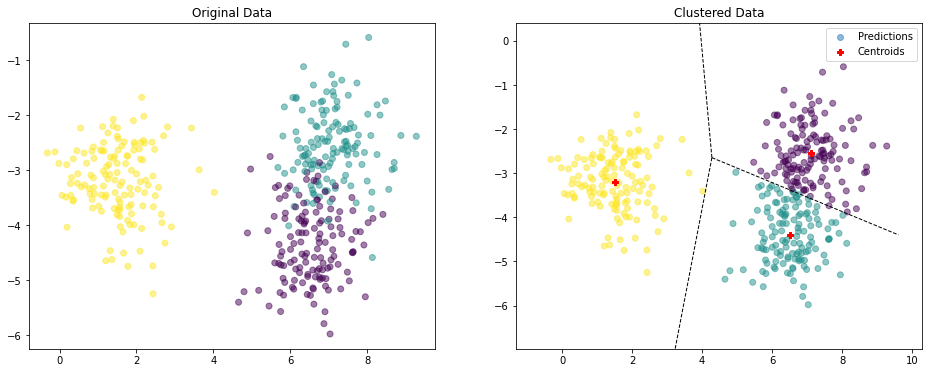

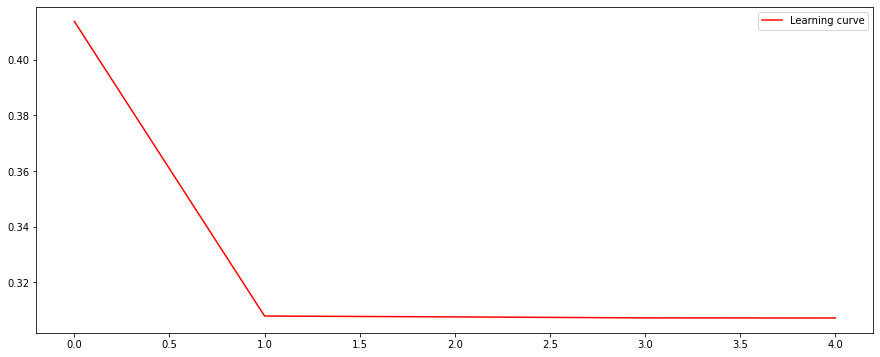

In [ ]:
ds = dataset1
print("Data set DS")
print()
x = np.array(ds[x_labels].copy())
y = np.array(ds[y_label].copy())
#calling all the function to initiate k mean algorithm
km, E, best_run = multi_start(x, num_iter=10) #3 clusters
c = km.get_centroids()
U = km.get_U()
hist = km.get_cost_history()
p = km.predict(x)
#calling jaccard and rand function and print 
print( '\n RandIndex:', (GT_list[0], U),'  ','jaccard index:',jaccard(GT_list[0], U))
U_ds1.append(U)
#plotting the iris data to visualize and show the clusters and centroid in the image
plot_clustered_data(x,y,c,p)
#plot a line graph that shows the learning curve, the less the learning curve the better it is
km.plot_cost_history(data=hist, label="Learning curve")

### 5, 6, 7, 8 -  Experiments with Fuzzy C-Means


In [ ]:
# to do
def multi_startFuzzyCMeans(x, k=3,tau=.0001, num_iter=10):
    #------------------------------------
    # constants assignement
    precision = 4
    E = np.inf
    num_iter = num_iter  # number of re-starts
    clusters=k
    tau_val=tau 
    #------------------------------------
    t_before = time.time()    
    #run until number of iterations are done
    for i in range(num_iter):
      #call Cmean functions to intiate
        km = FuzzyCMeans( k=clusters,  tau=tau_val, verbose=False)
        #fit will compute the predicted centroid 
        km.fit(x)
        EE= km.error
        Niter= km.iteration
        #print("run = {} - <E> = {:.{}f} ".format(i, EE, precision))
        print("run = {} - iterations = {} - <E> = {:.{}f} ".format(i, Niter-1, EE, precision))
        
        if EE < E:
            # store the best instance of trained model
            kmi = km
            E=EE
            best_run=i

    print ('\n best run = {} - <E> = {:.{}f}'.format(best_run, E, precision))
    t_after = time.time()
    ## Compute training time
    t_training = t_after - t_before
    #print("Time for multi-start training (seconds): {:.{}f} - num_iter = {}\n".format(t_training, precision, num_iter))

    return kmi, E, best_run

Data set DS 1

run = 0 - iterations = 6 - <E> = 0.3585 
run = 1 - iterations = 6 - <E> = 0.3585 
run = 2 - iterations = 8 - <E> = 0.3585 
run = 3 - iterations = 6 - <E> = 0.3585 
run = 4 - iterations = 7 - <E> = 0.3585 
run = 5 - iterations = 6 - <E> = 0.3585 
run = 6 - iterations = 6 - <E> = 0.3585 
run = 7 - iterations = 6 - <E> = 0.3585 
run = 8 - iterations = 6 - <E> = 0.5630 
run = 9 - iterations = 12 - <E> = 0.5630 

 best run = 4 - <E> = 0.3585

 rand index: (array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[1.04309152e-02, 6.98825339e-02, 9.99234430e-01, ...,
        1.60385953e-04, 1.02247610e-04, 1.63961764e-03],
       [1.19556987e-03, 4.60146136e-04, 1.90739357e-05, ...,
        9.99602171e-01, 1.89931423e-06, 4.97795927e-05],
       [9.88373515e-01, 9.29657320e-01, 7.46496127e-04, ...,
        2.37443191e-04, 9.99895853e-01, 9.98310603e-01]]))    jaccard index: 0.2697994663912557


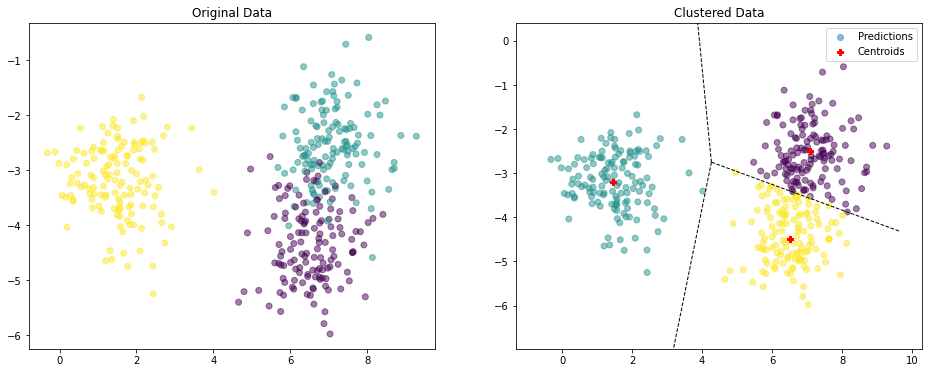

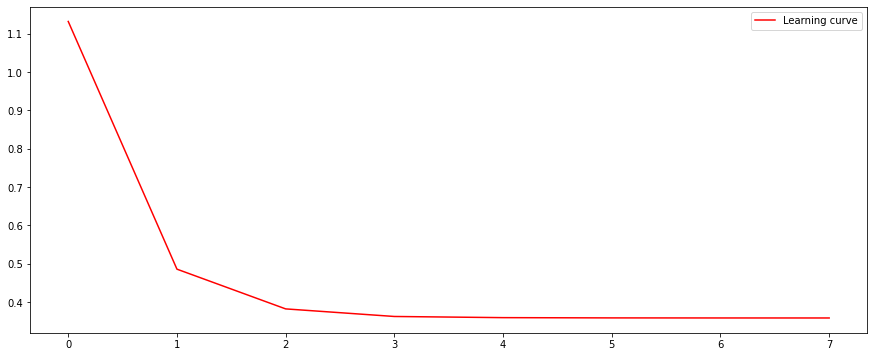

In [ ]:
ds_l=dataset1
#dataset of iris is dataset1
print("Data set DS 1")
print()
#create 2 copies of arrays and copy rows of dataset in to a new array
x = np.array(ds_l[x_labels].copy())
y = np.array(ds_l[y_label].copy())
#run the cmean algorthm 
km, E, best_run = multi_startFuzzyCMeans(x,k=3, num_iter=10) 
#calculate the centroids 
c = km.get_centroids()
U = km.get_U()
hist = km.get_cost_history()
p = km.predict(x)
#print(U,'\n',p)
#run the rand and jaccard index code to calculate the accuracy 
print( '\n rand index:',(GT_list[0], U),'  ','jaccard index:',jaccard(GT_list[0], U))
U_ds1.append(U)
plot_clustered_data(x,y,c,p)
km.plot_cost_history(data=hist, label="Learning curve")

### 5, 6, 7, 8 - Experiments with  Graded Possibilistic C-Means

In [ ]:
# to do 
def multi_startGPCM(x, k=3,tau=.0001,num_iter=10, eta_array=[0.1,0.1,0.1] ,gamma_value=1, beta_value=0.8):
    #---------------------------------
    # constants assignement
    #initialze the params required 
    precision = 4
    E = np.inf
    num_iter = num_iter  # number of re-starts
    clusters=k
    eta= eta_array
    gamma= gamma_value
    beta= beta_value
    clusters=k
    tau_val=tau
    #----------------------------------
    t_before = time.time()    
    for i in range(num_iter):
      #run GPCM code using the given params
        km = GPCM(k=3, tau=tau_val, eta=eta_array,gamma=1, beta=0.8, verbose=False)
        #run the fit algorithm to calculate the centroids
        #In central clustering data objects are points or vectors in data space, and c clusters are represented by means of their “central” points or centroids yj . The
#Graded Possibilistic model is a soft central clustering method, implying that cluster membership can be partial. This is usually represented by means of cluster
#indicators (or membership functions) which are real-valued rather than integer.
        km.fit(x)
        EE= km.error
        Niter= km.iteration
        #print("run = {} - <E> = {:.{}f} ".format(i, EE, precision))
        print("run = {} - iterations = {} - <E> = {:.{}f} ".format(i, Niter-1, EE, precision))
        
        if EE < E:
            # store the best instance of trained model
            kmi = km
            E=EE
            best_run=i

    print ('\n best run = {} - <E> = {:.{}f}'.format(best_run, E, precision))
    t_after = time.time()
    ## Compute training time
    t_training = t_after - t_before
    #print("Time for multi-start training (seconds): {:.{}f} - num_iter = {}\n".format(t_training, precision, num_iter))

    return kmi, E, best_run

Data set DS 1

run = 0 - iterations = 13 - <E> = 0.3101 
run = 1 - iterations = 18 - <E> = 0.4850 
run = 2 - iterations = 7 - <E> = 0.4888 
run = 3 - iterations = 13 - <E> = 0.4839 
run = 4 - iterations = 19 - <E> = 0.4850 
run = 5 - iterations = 16 - <E> = 0.3102 
run = 6 - iterations = 19 - <E> = 0.4850 
run = 7 - iterations = 68 - <E> = 1.8294 
run = 8 - iterations = 18 - <E> = 0.3107 
run = 9 - iterations = 11 - <E> = 0.3106 

 best run = 0 - <E> = 0.3101

 rand index: (array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[8.10355186e-04, 6.26308251e-02, 9.29560519e-01, ...,
        1.88032396e-22, 1.15042962e-02, 2.32515663e-03],
       [8.05191449e-01, 8.15198867e-01, 4.14516610e-03, ...,
        1.42705360e-17, 9.81288112e-01, 9.18684919e-01],
       [1.48097945e-11, 4.21381216e-20, 1.32952731e-20, ...,
        8.77622065e-01, 9.31488499e-17, 5.03111261e-18]]))    jaccard index: 0.27043689403984916


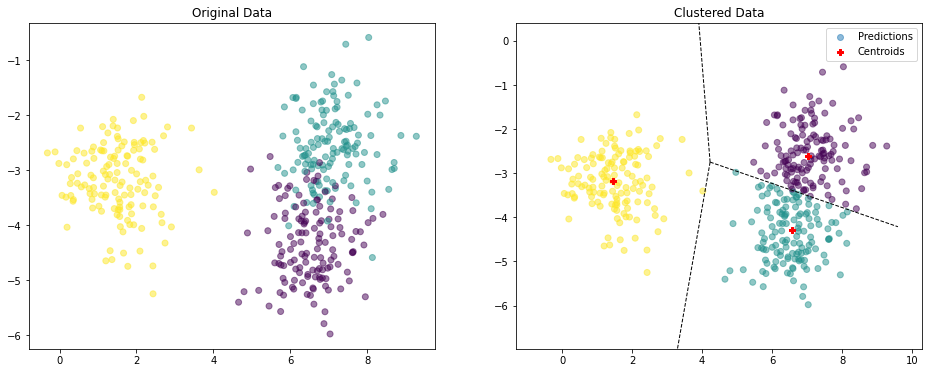

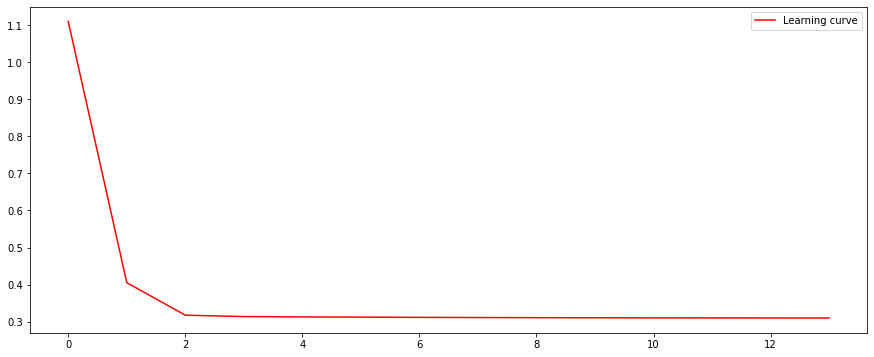

In [ ]:
ds_l = dataset1

print("Data set DS 1")
print()
x = np.array(ds_l[x_labels].copy())
y = np.array(ds_l[y_label].copy())
km, E, best_run = multi_startGPCM(x, k=3, eta_array=[0.7,0.7,0.7],num_iter=10) 
c = km.get_centroids()
U = km.get_U()
hist = km.get_cost_history()
p = km.predict(x)
#print(U,'\n',p)
print( '\n rand index:',(GT_list[0], U),'  ','jaccard index:',jaccard(GT_list[0], U))
U_ds1.append(U)
plot_clustered_data(x,y,c,p)
km.plot_cost_history(data=hist, label="Learning curve")

# Optional Part A

## Clustering Ensembling

## Partition Diversity
We exploit **clustering algorithms diversity** to obtain ensemble models with high stability 

Possible strategies to increase diversity:
* Different clustering algorithms and weak clustering algos, e.g., only few iterations of k-means to avoid convergence;
* Randomizing using different initializations; different n. of clusters to look for;
* Different data sets: resampling with replacement (bagging); resampling without replacement;
* Different feature subsets (random subspace method).

## A1 - Consensus Matrix implementation

**A1**

A popular use of the Consensus Matrix:

* Given data set $Z ={z_1 , ..., z_N}$ with N elements.
* Pick the ensemble size L and the number of clusters $c$.
* Generate $L$ hard partitions of $Z$ in $c$ clusters.
* Form a co-association matrix for each partition,
$M(k)={m_{ij}(k)}$ of size $N\times N$, $k=1, ...,L$, where

$$m_{ij}(k) = \left \{ \begin{array}{rl}
1, &\mbox{ if $z_i$ and $z_j$ are in the same cluster in partition $k$},\\
0, &\mbox{ if $z_i$ and $z_j$ are in different clusters in partition $k$.}
\end{array}
\right.
$$
 
* Form a final co-association matrix M (consensus matrix) by averaging the $L$ co-association matrices M(k).
* Derive the final clustering using this matrix by applying an  $\alpha$-cut rule.

<img src="consensus-matrix.jpg" width="600"/>


In [ ]:
def coassoc_matrix(U):
    #input: hard membership matrix
    #output: co-association matrix
    
    # insert code here

    return C

def cons_matr(CC, alpha): 
      # input: CC list of L co-association matrices representing L partitions,
      # alpha threshold
      # output ensemble co-association matrix

    # insert code here
   
    # consensu matrix C as average the L co-association matrices in CC 
    # compare the elements of C with threshold alpha. 
                    #If larger set the element to 1 otherwise to 0
    # tranform C in an hard membership matrix 
    return C 

## A2, A3, A4 - Experiments on Consensus Matrix ensembling


* **A2**. For each data set, take the 9 hard best partitions obtained for data set DS2 in Part A and construct an ensemble using the tecnique of the consensus matrix. 
* **A3**. Visualize the results on the scatter plot, highlighting the centroids and using a different color for each cluster.
* **A4**. Measure the *accuracy* of the  partition induced by the consensus matrix by comparing it with the ground-truth constituted by the targets of the data sets. For the comparison use RAND index. Find the best value for the threshold $\alpha$.




In [ ]:
#For each data set, take the 9 hard partitions obtained for data set DS2 in Part A

# insert code here

# using coassoc-matrix obtain the 9 co-association matrices

# insert code here

# using cons_matr (with alpha=.4) obtain the ensemble co-association matrix


# insert code here
   

# Create a scatterplot of first two features



# insert code here
   

# display learning curve



# insert code here
   


# Measure the accuracy of the hard partitions (GT is the ground-truth)

# insert code here



# Optional Part B: Study of the Graded Possibilistic C-Means algorithm

Implement a soft transition from probabilistic clustering to possibilistic clustering:
* Define a scheduling for $\beta$, e.g. $(1, .8, .6, .4, .2, 0)$ and for any value of $\beta$ run the GPCM starting from the results obtained in the previous run.
*  After each run evalutate the accuracy. 
* Test on the 3 data sets.

# (h) Discussion

* What are the best results?         

K-Means Clustering is a hard clustering algorithm
Fuzzy C-Means clustering is a soft clustering approach, where each data point is assigned a likelihood or probability score to belong to that cluster
Fuzzy c-means clustering has can be considered a better algorithm compared to the k-Means algorithm. Unlike the k-Means algorithm where the data points exclusively belong to one cluster, in the case of the fuzzy c-means algorithm, the data point can belong to more than one cluster with a likelihood. Fuzzy c-means clustering gives comparatively better results for overlapped data sets.

In our above results we also find out that         
K mean jaccard index: 0.2700055092624475        
Cmean jaccard index: 0.2696279213850549        
GPCM jaccard index: 0.27043689403984916         

My results shows that GPCM turns out to be most accurate representations of the clusters        



* Additional discussion here